**These Notebooks are an ongoing Project to determine 'Chamleon Trucking' Companies in The United States. This Page contain Data for In Service Carriers(Trucking companies currently in service).For More info on Chameleon Trucking,See the following Link https://www.atlantainjurylawblog.com/uncategorized/what-is-a-chameleon-trucking-company-and-how-does-it-keep-doing-dangerous-stuff.html**


In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
import geocoder
import geopandas
#Vizualisations
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

Data Collection

In [ ]:
"""
The following Steps 3 Steps are done on the Propel's jupyter files to 
save space since the process must be repeated for all 1M+ points
"""

# !pip install geopandas
# #import geopandas as gpd
# import geocoder


# lst1 = []
# lst3 = []

# #20000 datapoints
# No_IS_Cord_1 = No_IS_Coord[0:1001]

# for i in range(0, len(No_IS_Cord_1)):
#   g = geocoder.arcgis(No_IS_Cord_1.loc[i,"address"])
#   for result in g:
#     lst1.append([g.lat,g.lng])
# No_IS_Cord_1 = pd.DataFrame(lst1)
# indx = list(range(0,20001))

# #Change indecies of Df to last 35104 indicies
# No_IS_Cord_1.set_index(pd.Index(indx),inplace=True)
# print(No_IS_Cord_1.head(15))

#IS_first_20K.to_csv('/home/propel/projects/Chameleon Project/IS_first_20K', index = False)
# IS_first_20K = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/IS_first_20K.csv")

In [ ]:
# Load the In Service Carriers(IS) CSV files
IS_first_20K = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/IS_first_20K.csv")
IS_20001_40K = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/IS_20001_40K.csv")
IS_40K_100K = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/IS_40K_100K.csv")
IS_100K_200K = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/IS_100001K_200Kf.csv")
Last_IS_Coords = pd.read_csv("C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/Last_IS_Coords.csv")

In [ ]:
# Merge the IS Carriers Dfs
# Order Indicies Correctly
indx1 = list(range(20001,40000))
IS_20001_40K.set_index(pd.Index(indx1),inplace=True)
# Rename Headers
IS_20001_40K.rename(columns={'usdot': 'USDOT', 'legal_name': "LEGAL_NAME", 'dba_name': "dba_name"
                      , 'State': "STATE", 'City': "CITY",'address': "FULL_ADDRESS","LONG":"LON"}
                          , inplace=True)
print(IS_20001_40K.tail(1))

indx2 = list(range(40000,99999))
IS_40K_100K.set_index(pd.Index(indx2),inplace=True)
IS_40K_100K.rename(columns={'usdot': 'USDOT', 'legal_name': "LEGAL_NAME", 'dba_name': "dba_name"
                      , 'State': "STATE", 'City': "CITY",'address': "FULL_ADDRESS","LAT":"LAT","LONG":"LON"}
                          , inplace=True)
print(IS_40K_100K.head(1))

indx3 = list(range(99999,199999))
IS_100K_200K.set_index(pd.Index(indx3),inplace=True)
IS_100K_200K.rename(columns={'usdot': 'USDOT', 'legal_name': "LEGAL_NAME", 'dba_name': "dba_name"
                      , 'State': "STATE", 'City': "CITY",'address': "FULL_ADDRESS","LAT":"LAT","LONG":"LON"}
                          ,inplace=True)
print(IS_100K_200K.head(1))


indx4 = list(range(199999,235103))
Last_IS_Coords.set_index(pd.Index(indx4),inplace=True)
Last_IS_Coords.rename(columns={'usdot': 'USDOT', 'legal_name': "LEGAL_NAME", 'dba_name': "dba_name"
                        , 'State': "STATE", 'City': "CITY",'address': "FULL_ADDRESS","LAT":"LAT","LONG":"LON"}
                          , inplace=True)
print(Last_IS_Coords.head(1))

# Merge the Dfs   reset_index(drop=True)
pdList = [IS_first_20K, IS_20001_40K, IS_40K_100K, IS_100K_200K]
Concat_IS  = pd.concat(pdList).reset_index(drop=True)
Concat_IS = Concat_IS.drop(columns=['Unnamed: 0'])
Concat_IS.shape

Pre-processing: Feature Engineering



In [ ]:
# Look for Incorrect 'STATE NAMES"
n5 = []
for i in range(0,len(Concat_IS)):
  if len(Concat_IS.loc[i,'STATE']) != 2:
    n5.append(Concat_IS.loc[i])
BAD_ST_Df1 = pd.DataFrame(n5)
print(BAD_ST_Df1.shape)

# Filter Out these Incorrect Names
keys = list(BAD_ST_Df1.columns.values)
i1 = Concat_IS.set_index(keys).index
i2 =  BAD_ST_Df1.set_index(keys).index
Cl_STATE_Df1 =  Concat_IS[~i1.isin(i2)]
print(Cl_STATE_Df1.shape)

In [ ]:
# SAVE 
Cl_STATE_Df1.to_csv('C:/Users/Rae-Djamaal/Anaconda3/Lib/site-packages/Chameleon_Proj/Cl_STATE_Df1.csv', index = False)

Data Vizualization

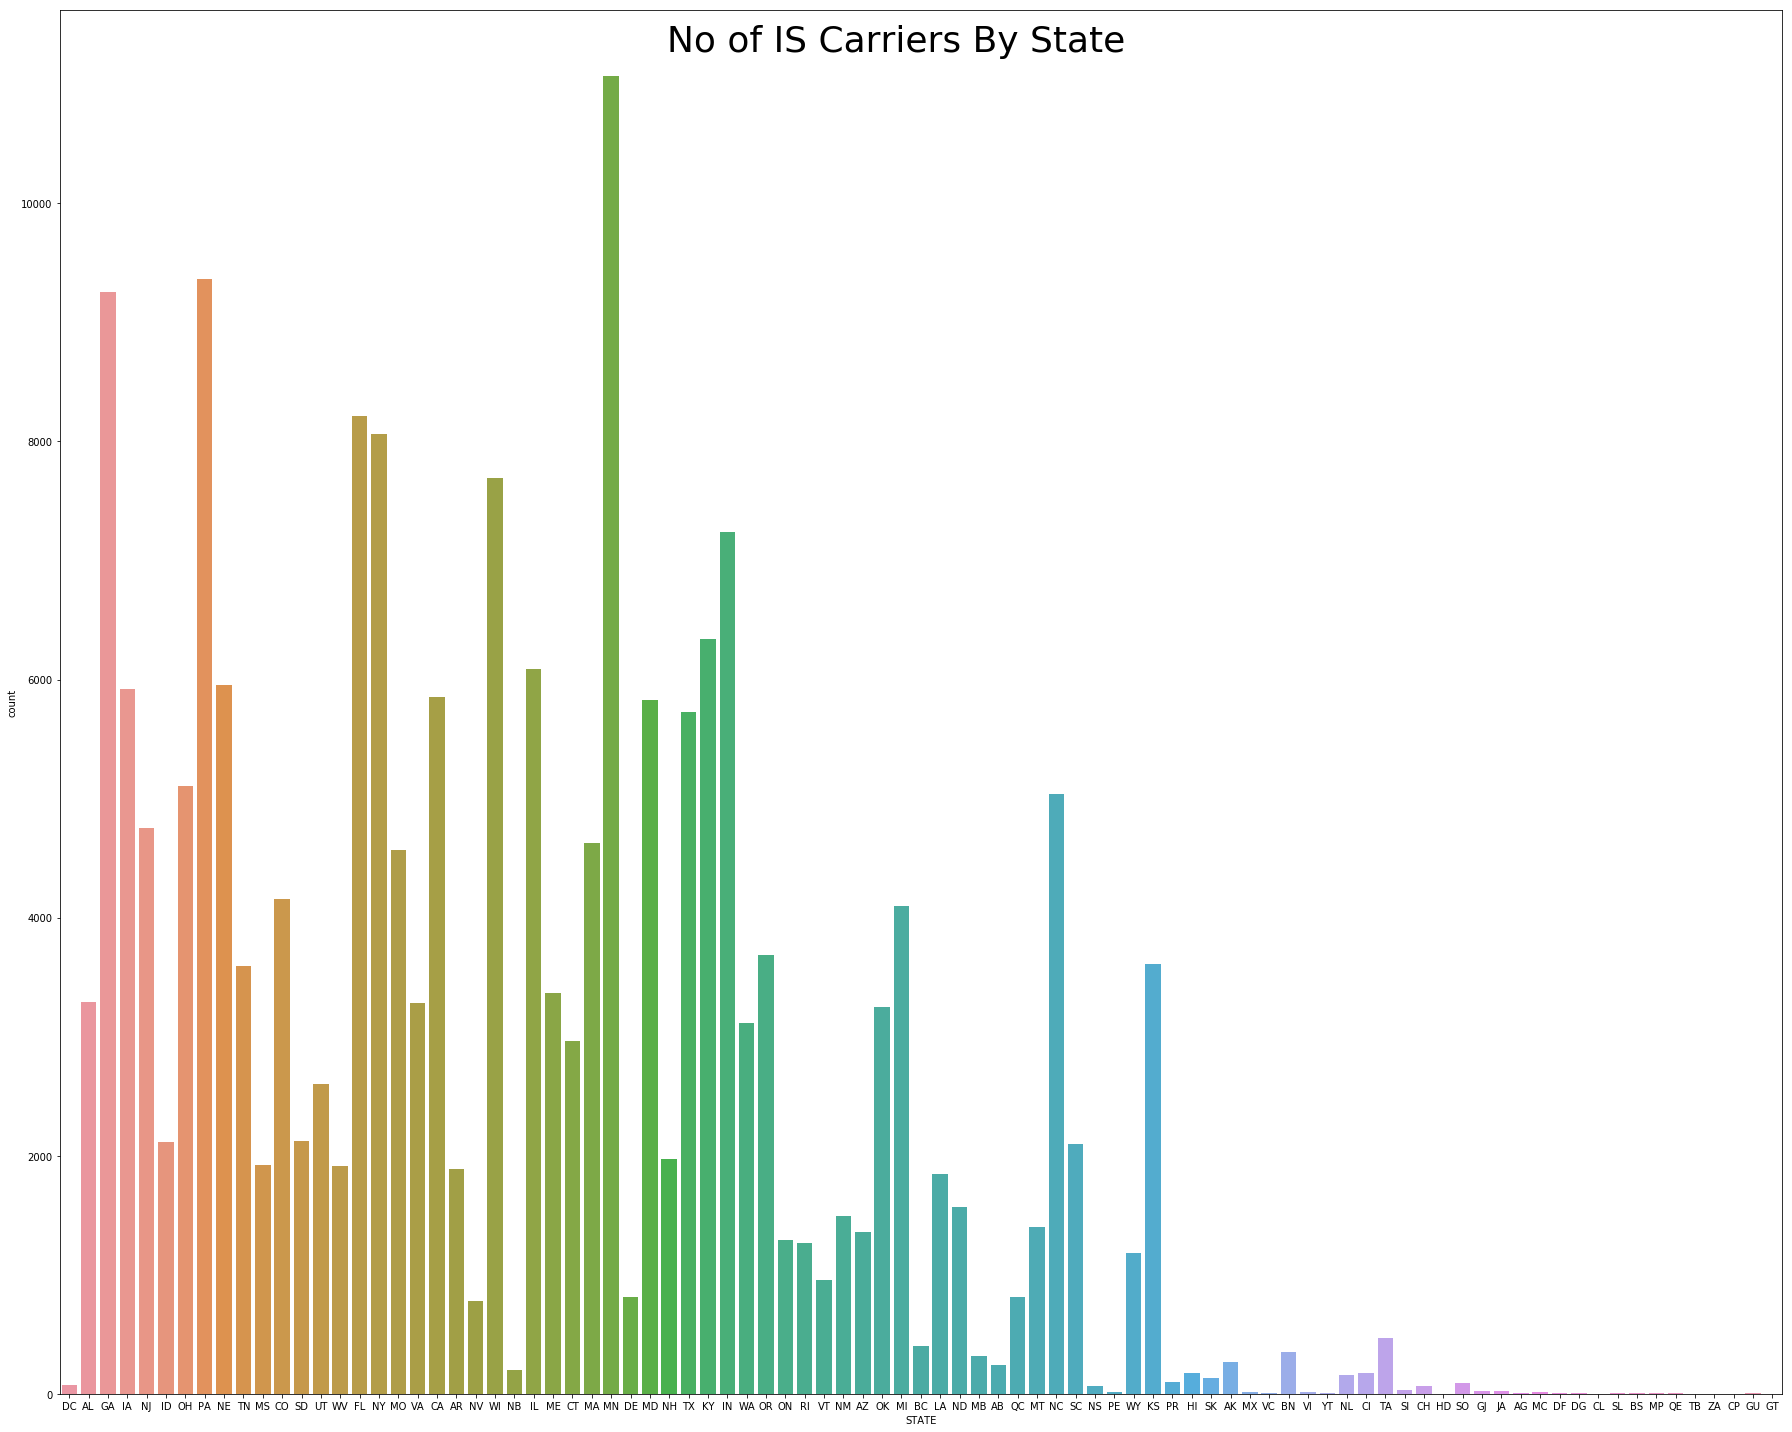

In [ ]:
#Count By State

plt.figure(figsize=(25,20)) 

St_plt = sns.countplot(x="STATE", data = Cl_STATE_Df1)
plt.suptitle('No of IS Carriers By State',fontsize=36)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


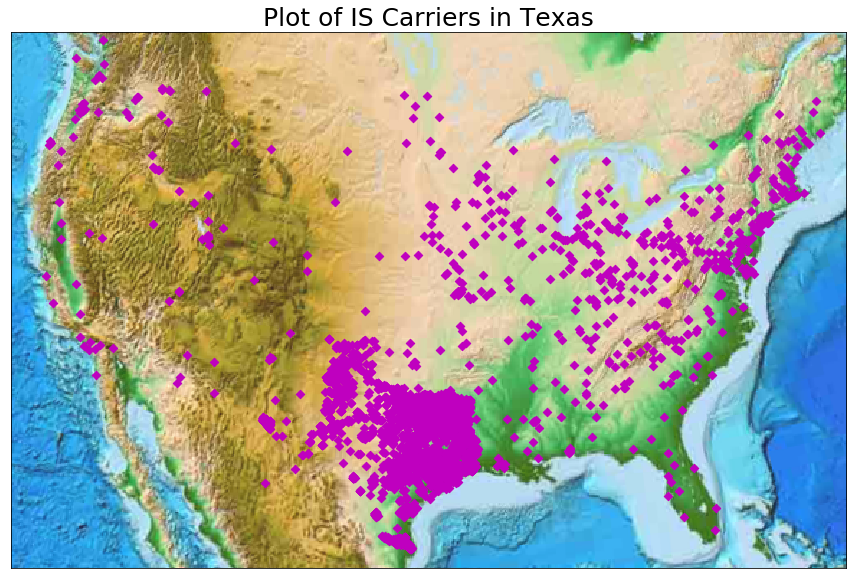

In [ ]:
# Plot of Texas for example
fig = plt.figure(figsize=(12, 15))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.etopo(scale=0.9, alpha=0.9)


Cl_STATE_Df1_TX = Cl_STATE_Df1[Cl_STATE_Df1['STATE']=='TX']
Cl_STATE_Df1_TX["LAT"] = pd.to_numeric(Cl_STATE_Df1_TX["LAT"])
Cl_STATE_Df1_TX["LON"] = pd.to_numeric(Cl_STATE_Df1_TX["LON"])


lon = Cl_STATE_Df1_TX["LON"].tolist()
lat = Cl_STATE_Df1_TX["LAT"].tolist()

x, y = m(lon, lat )
m.scatter(x, y, marker='D',color='m')
plt.title('Plot of IS Carriers in Texas',fontsize=25)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


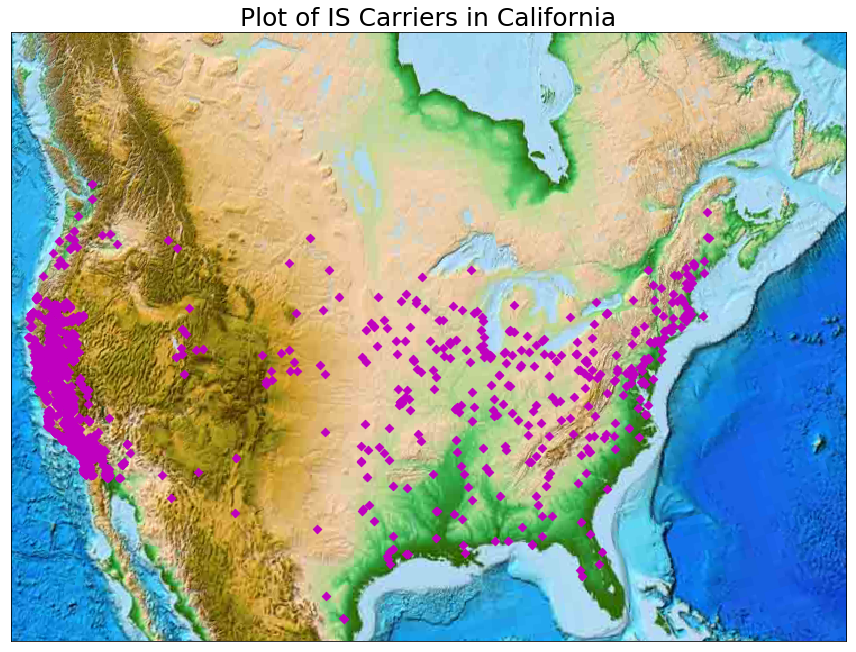

In [ ]:
# Try California
fig = plt.figure(figsize=(12, 15))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-49,urcrnrlat=54,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.etopo(scale= 1, alpha=1)


Cl_STATE_Df1_CA = Cl_STATE_Df1[Cl_STATE_Df1.loc[:,'STATE']=='CA']
Cl_STATE_Df1_CA["LAT"] = pd.to_numeric(Cl_STATE_Df1_CA.loc[:,"LAT"])
Cl_STATE_Df1_CA["LON"] = pd.to_numeric(Cl_STATE_Df1_CA.loc[:,"LON"])


lon = Cl_STATE_Df1_CA["LON"].tolist()
lat = Cl_STATE_Df1_CA["LAT"].tolist()

x, y = m(lon, lat )
m.scatter(x, y, marker='D',color='m')
plt.title('Plot of IS Carriers in California',fontsize=25)
plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Rae-Djamaal\Anaconda3\Lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


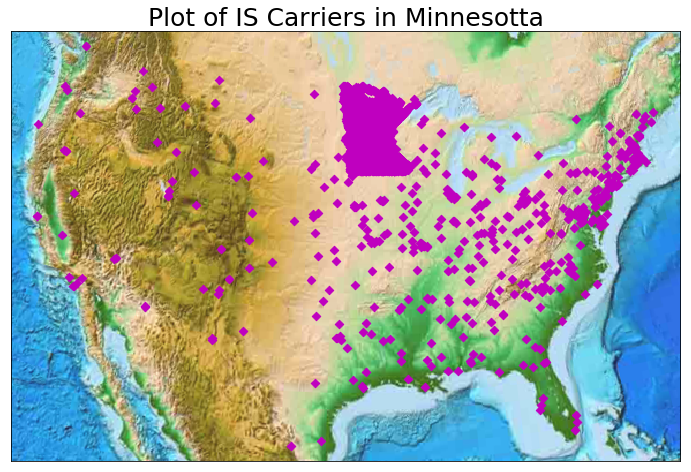

In [ ]:
# Try Minnesotta
fig = plt.figure(figsize=(12, 15))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.etopo(scale=0.9, alpha=0.9)


Cl_STATE_Df1_MN = Cl_STATE_Df1[Cl_STATE_Df1['STATE']=='MN']
Cl_STATE_Df1_MN["LAT"] = pd.to_numeric(Cl_STATE_Df1_MN["LAT"])
Cl_STATE_Df1_MN["LON"] = pd.to_numeric(Cl_STATE_Df1_MN["LON"])


lon = Cl_STATE_Df1_MN["LON"].tolist()
lat = Cl_STATE_Df1_MN["LAT"].tolist()

x, y = m(lon, lat )
m.scatter(x, y, marker='D',color='m')
plt.title("Plot of IS Carriers in Minnesotta",fontsize=25)
plt.show()